In [2]:
# Chargement des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import prince

ModuleNotFoundError: No module named 'prince'

In [4]:
# Chargement des données
saumons = pd.read_csv("saumons.csv", sep=',')

# Vérifier les premières lignes du DataFrame
print(saumons.head())
print(saumons.columns)

  District  District ID  Report order Region                   Method    Year  \
0    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
1    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
2    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
3    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
4    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   

      Month  Month number  Wild MSW number  Wild MSW weight (kg)  ...  \
0  February           2.0            107.0                 400.5  ...   
1  February           2.0           6606.0               24856.9  ...   
2     March           3.0            185.0                 703.1  ...   
3     March           3.0           7008.0               26151.9  ...   
4     April           4.0            484.0                1912.3  ...   

   Wild 1SW weight (kg)  Sea trout number  Sea trout weight (kg)  \
0     

In [5]:
# Importation des données
Method= saumons["Method"];
# Nombre d'occurrences par catégorie 
saumons["Method"].value_counts() 

Method
Fixed Engine: Retained     13811
Net and Coble: Retained     9291
Fixed Engine: Released        27
Net and Coble: Released       11
Name: count, dtype: int64

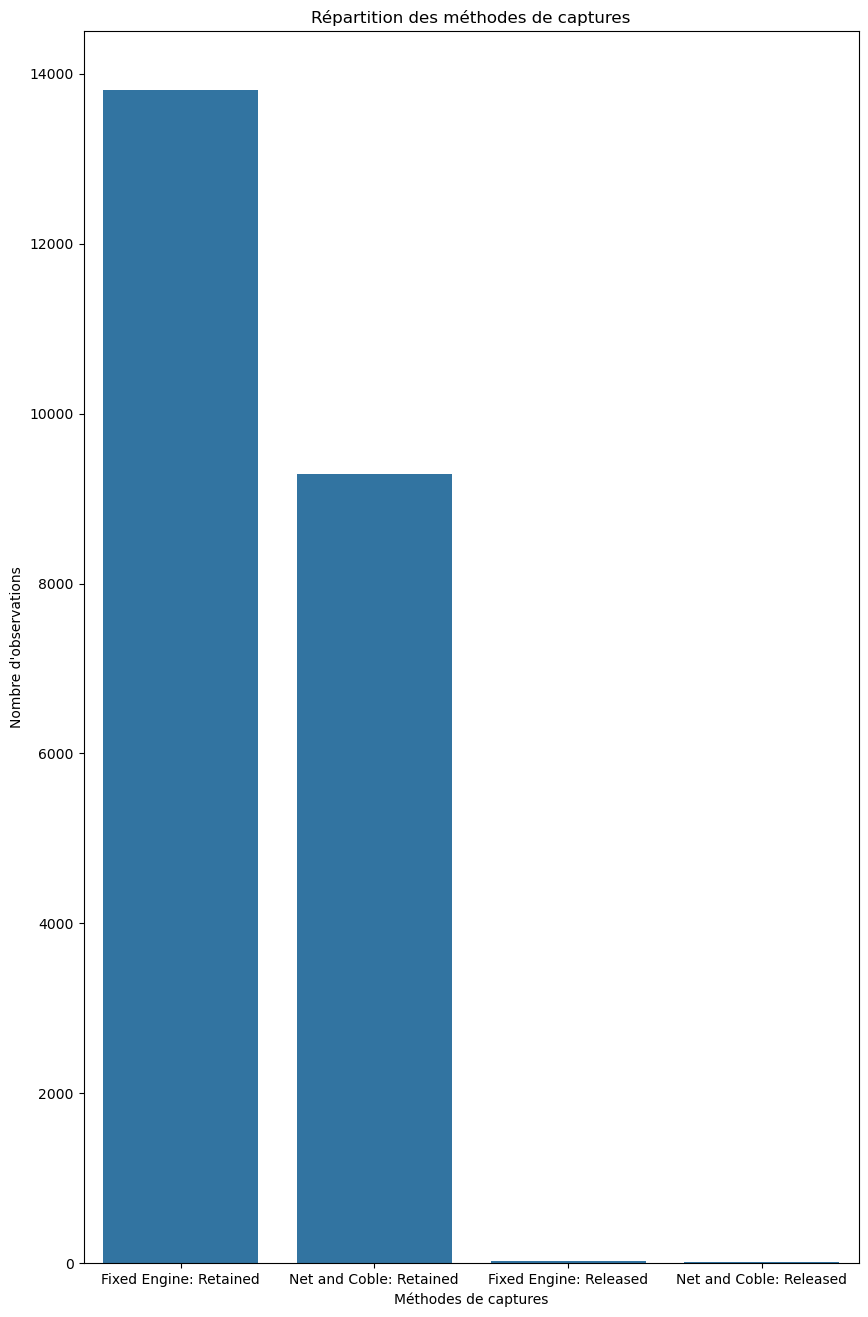

In [6]:
# On trace ensuite un histogramme pour visualiser la répartition 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,16))
ax = sns.countplot(x=saumons["Method"], order=saumons["Method"].value_counts().index)
plt.xlabel("Méthodes de captures")
plt.ylabel("Nombre d'observations")
plt.title("Répartition des méthodes de captures")
plt.show()

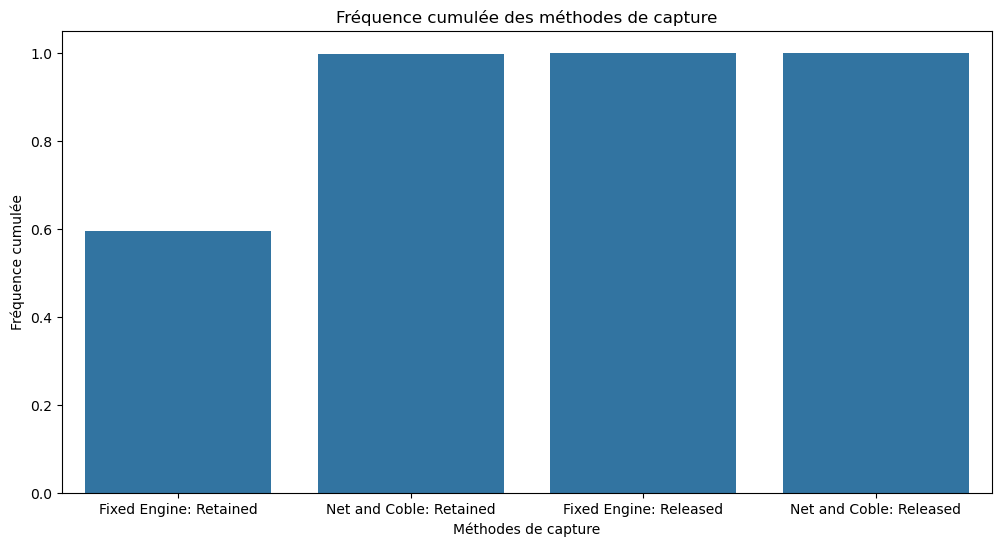

In [7]:
#Création d'un histogramme avec les fréquences cumulées
counts = saumons["Method"].value_counts()
cumulative_frequencies = counts.cumsum() / counts.sum()  # Normalisation en pourcentage
# Création du graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=cumulative_frequencies.index, y=cumulative_frequencies.values)
plt.xlabel("Méthodes de capture")
plt.ylabel("Fréquence cumulée")
plt.title("Fréquence cumulée des méthodes de capture")
plt.show()

In [8]:
mois_ordre = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
saumons['Month'] = pd.Categorical(saumons['Month'], categories=mois_ordre, ordered=True)
# Affichage des modalités uniques
print("Modalités de 'Month' :", saumons['Month'].unique())

Modalités de 'Month' : ['February', 'March', 'April', 'May', 'June', ..., 'August', 'September', 'November', 'October', NaN]
Length: 11
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


In [10]:
# Tableau résumé
effectifs = saumons['Month'].value_counts().sort_index()
frequences = effectifs / effectifs.sum()
tableau = pd.DataFrame({'Effectif': effectifs, 'Fréquence': frequences.round(4)})
print("\nTableau résumé :\n", tableau)


Tableau résumé :
            Effectif  Fréquence
Month                         
January           0     0.0000
February       1039     0.0449
March          1461     0.0631
April          2230     0.0964
May            3428     0.1481
June           4462     0.1928
July           4978     0.2151
August         4514     0.1951
September      1026     0.0443
October           1     0.0000
November          1     0.0000
December          0     0.0000


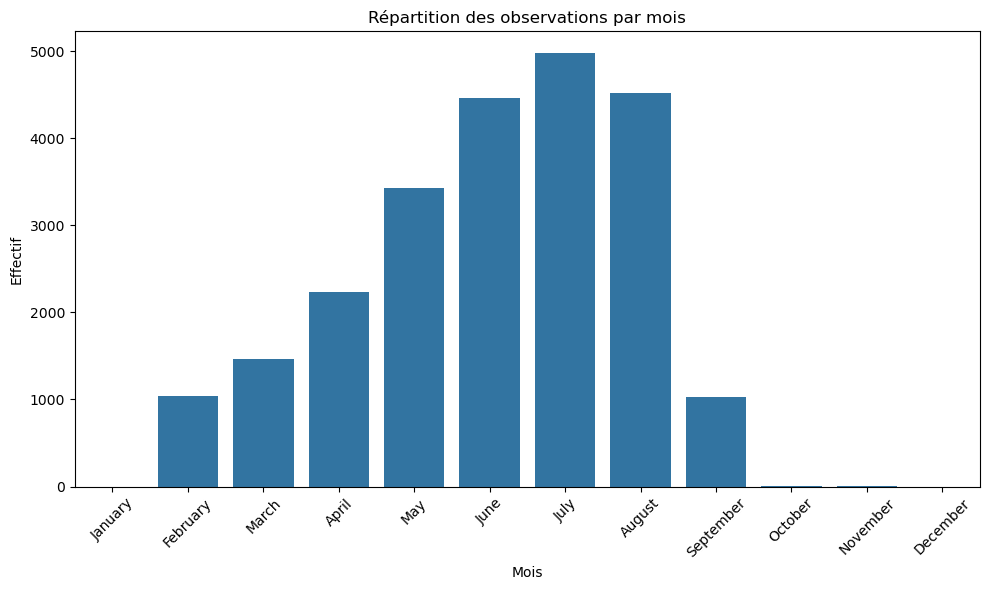

In [11]:
# Affichage graphique
plt.figure(figsize=(10,6))
sns.barplot(x=effectifs.index, y=effectifs.values)
plt.title('Répartition des observations par mois')
plt.xlabel('Mois')
plt.ylabel('Effectif')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comment les différentes méthodes de pêche sont-elles réparties au cours de l’année, et peut-on identifier des périodes privilégiées pour certaines techniques ?

In [13]:
df = pd.read_csv("saumons.csv", sep=',')

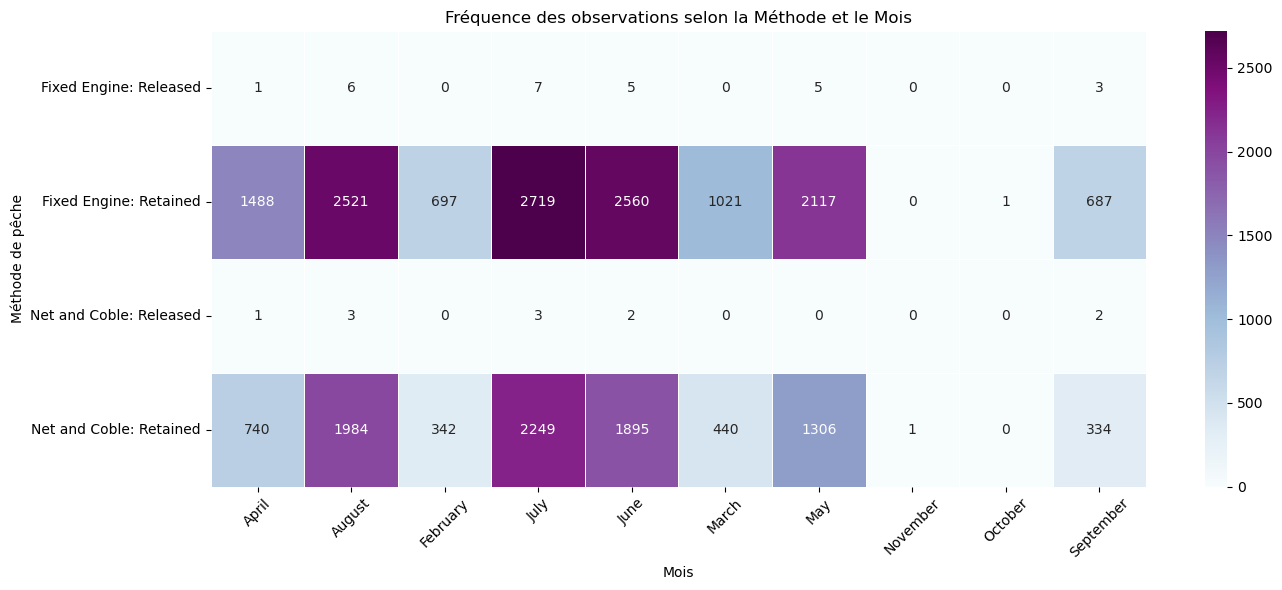

In [21]:
# Charger les données (adapte le chemin si nécessaire)
df = pd.read_csv("Saumons.csv")

# Extraire uniquement les colonnes utiles
df_month_method = df[['Month', 'Method']].dropna()

# Grouper les données par Month et Method
month_method_counts = df_month_method.groupby(['Month', 'Method']).size().reset_index(name='Count')

# Ordonner les mois pour l'affichage
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_month_method['Month'] = pd.Categorical(df_month_method['Month'], categories=month_order, ordered=True)
month_method_counts['Month'] = pd.Categorical(month_method_counts['Month'], categories=month_order, ordered=True)

# Créer une table pivot pour la heatmap
pivot_mm = month_method_counts.pivot(index='Method', columns='Month', values='Count').fillna(0)

# Affichage de la heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_mm, cmap='BuPu', annot=True, fmt='.0f', linewidths=0.5)
plt.title("Fréquence des observations selon la Méthode et le Mois")
plt.xlabel("Mois")
plt.ylabel("Méthode de pêche")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La heatmap présente la fréquence d’observation pour chaque couple (Méthode de pêche, Mois). Les valeurs sont codées par couleur (plus la case est foncée, plus la fréquence est élevée) et aussi annotées numériquement pour plus de clarté.

Enseignements principaux :
Deux méthodes dominantes :

Fixed Engine: Retained et Net and Coble: Retained représentent la quasi-totalité de l’activité observée.

Ces deux techniques sont responsables de plusieurs milliers d’observations, en particulier durant les mois de printemps et d’été.

Saisonnalité marquée :

Le cœur de l’activité se concentre entre avril et août, avec un pic net en juin et juillet pour les deux méthodes principales.

De janvier à mars et de septembre à décembre, l’activité est quasi inexistante.

Méthodes Released (relâchement du poisson) :

Fixed Engine: Released et Net and Coble: Released sont extrêmement marginales dans les données.

Leur très faible nombre d’observations (souvent < 5) peut indiquer :

Soit une pratique très peu courante,

Soit une sous-déclaration (ex : le relâchement n’est pas systématiquement noté).

Comparaison des méthodes principales :

Fixed Engine: Retained semble légèrement plus concentrée sur les mois de juin-juillet, avec des pics dépassant parfois 2500 observations.

Net and Coble: Retained a une distribution un peu plus étalée sur l’année (de mars à septembre), mais reste très saisonnière également.

Cette visualisation met en évidence une forte saisonnalité dans les pratiques de pêche. Les techniques dominantes sont essentiellement utilisées durant l’été, ce qui peut s’expliquer par :

La migration saisonnière du saumon,

Les conditions climatiques favorables,

Ou encore des réglementations locales encadrant les périodes de pêche.

L’absence d’activité sur certaines méthodes pose également la question de leur utilité réelle ou de leur déclaration effective dans les rapports officiels.